<a href="https://colab.research.google.com/github/jesminmousumy/Python-Programming/blob/main/Exercise_6_Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1. Load and Understand the Data

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Online Retail.csv')

# Display the first few rows
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [ ]:
# Explore the data
print(df.info())  # Check data types and missing values
print(df.describe())  # Summary statistics for numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50537 entries, 0 to 50536
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    50537 non-null  object 
 1   StockCode    50537 non-null  object 
 2   Description  50394 non-null  object 
 3   Quantity     50536 non-null  float64
 4   InvoiceDate  50536 non-null  object 
 5   UnitPrice    50536 non-null  float64
 6   CustomerID   32363 non-null  float64
 7   Country      50536 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.1+ MB
None
           Quantity     UnitPrice    CustomerID
count  50536.000000  50536.000000  32363.000000
mean       8.260349      6.386809  15415.904212
std       55.238019    165.620272   1758.086487
min    -9360.000000      0.000000  12347.000000
25%        1.000000      1.250000  14032.000000
50%        2.000000      2.510000  15460.000000
75%        8.000000      4.250000  17033.000000
max     2880.000000  16888.0200

In [19]:
# Step 2: Clean the Data
# Check for missing values
print(df.isnull().sum())

# Handle missing values (fill or drop)
# Convert columns to numeric if they contain numbers as strings
for col in df.select_dtypes(include=['object']).columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='raise')  # Try converting to numeric
    except ValueError:
        # Handle the case where conversion fails due to non-numeric strings
        print(f"Column '{col}' contains non-numeric strings and cannot be converted.")
        # Instead of skipping, drop the column if it's 'InvoiceNo' or 'StockCode'
        if col in ['InvoiceNo', 'StockCode', 'Description']:  # Include 'Description' here
            df = df.drop(columns=[col])
        else:
            # Handle other non-numeric columns (e.g., one-hot encoding)
            # You'll likely need to encode these columns later
            print(f"Column '{col}' will require encoding or further processing.")

df = df.fillna(df.mean(numeric_only=True))  # Fill missing numeric values with the mean
df = df.dropna()  # Drop rows with missing values (if necessary)

# Check for duplicates
print(df.duplicated().sum())  # Count duplicates
df = df.drop_duplicates()  # Remove duplicates

# Instead of skipping, drop the column if it's 'InvoiceNo', 'StockCode', or 'Description'
if col in ['InvoiceNo', 'StockCode', 'Description']:
    df = df.drop(columns=[col])

Description    0
Quantity       0
Date           0
UnitPrice      0
CustomerID     0
Country        0
SalesAmount    0
Year           0
Month          0
Day            0
dtype: int64
Column 'Description' contains non-numeric strings and cannot be converted.
Column 'Country' contains non-numeric strings and cannot be converted.
Column 'Country' will require encoding or further processing.
17219


           Quantity     UnitPrice    CustomerID   SalesAmount
count  37140.000000  37140.000000  37140.000000  37140.000000
mean       8.133360      6.259826  15542.485548     17.647340
std       61.406429    149.029021   1404.446233    164.327254
min    -9360.000000      0.000000  12347.000000 -13541.330000
25%        1.000000      1.280000  14911.000000      3.360000
50%        2.000000      2.510000  15549.270857      8.470000
75%        8.000000      4.250000  16274.000000     17.280000
max     2880.000000  13541.330000  18269.000000  13541.330000


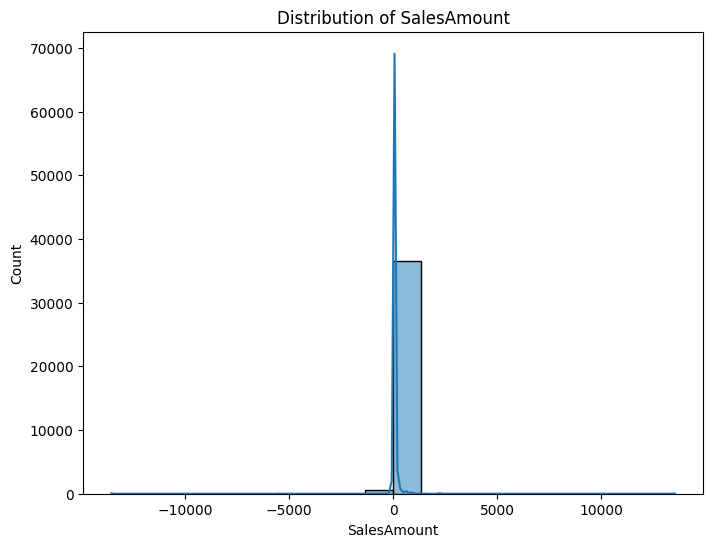

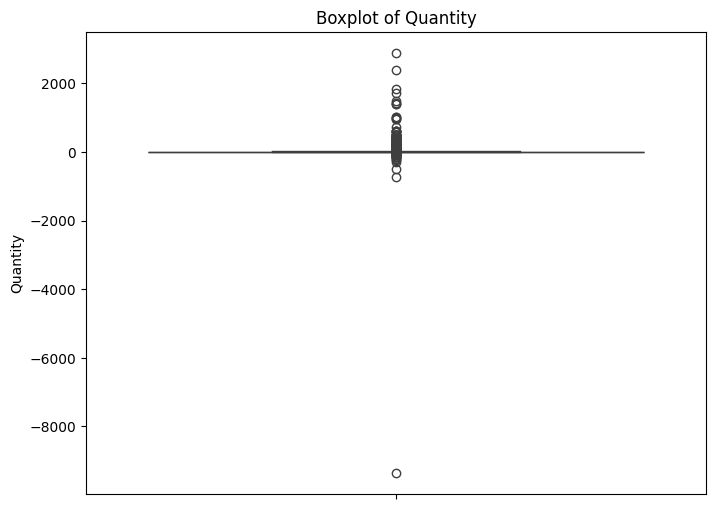

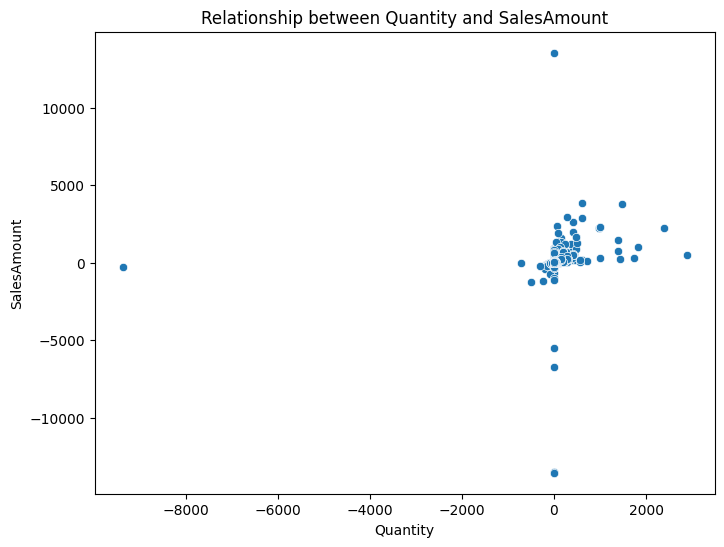

In [4]:
# Step 3: Exploratory Data Analysis (EDA)
# Create 'SalesAmount' column if it doesn't exist
if 'SalesAmount' not in df.columns:
    df['SalesAmount'] = df['Quantity'] * df['UnitPrice']

# Summarize the data
print(df.describe())

# Visualize the distribution of SalesAmount
plt.figure(figsize=(8, 6))
sns.histplot(df['SalesAmount'], bins=20, kde=True)
plt.title('Distribution of SalesAmount')
plt.show()

# Boxplot for QuantitySold to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df['Quantity'])  # Changed to 'Quantity' to match column name
plt.title('Boxplot of Quantity')  # Changed to 'Quantity' to match column name
plt.show()

# Scatter plot to explore relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='SalesAmount', data=df)  # Changed to 'Quantity' to match column name
plt.title('Relationship between Quantity and SalesAmount')  # Changed to 'Quantity' to match column name
plt.show()

In [7]:
# Step 4: Feature Engineering
# Convert Date column to datetime and extract features
# Check if 'Date' column exists (case-insensitive)
if 'Date' not in df.columns:
    # Find columns containing 'date' (case-insensitive)
    date_columns = [col for col in df.columns if 'date' in col.lower()]

    # If a column containing 'date' is found, rename it to 'Date'
    if date_columns:
        df = df.rename(columns={date_columns[0]: 'Date'})
    else:
        raise KeyError("No 'Date' column found in the DataFrame")

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [20]:
# One-hot encode categorical variables (improved)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()  # Get all object type columns

if categorical_cols:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
else:
    print("No categorical columns found for one-hot encoding.")

# Display the updated dataframe
print(df.head())

   Quantity                Date  UnitPrice  CustomerID  SalesAmount  Year  \
0       6.0 2010-12-01 08:26:00       2.55     17850.0        15.30  2010   
1       6.0 2010-12-01 08:26:00       3.39     17850.0        20.34  2010   
2       8.0 2010-12-01 08:26:00       2.75     17850.0        22.00  2010   
5       2.0 2010-12-01 08:26:00       7.65     17850.0        15.30  2010   
6       6.0 2010-12-01 08:26:00       4.25     17850.0        25.50  2010   

   Month  Day  Country_Austria  Country_Belgium  ...  Country_Japan  \
0     12    1            False            False  ...          False   
1     12    1            False            False  ...          False   
2     12    1            False            False  ...          False   
5     12    1            False            False  ...          False   
6     12    1            False            False  ...          False   

   Country_Lithuania  Country_Netherlands  Country_Norway  Country_Poland  \
0              False             

In [21]:
# Step 5: Model Building
# Split the data into features (X) and target (y)
X = df.drop(columns=['SalesAmount', 'Date'])  # Features
y = df['SalesAmount']  # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Mean Squared Error: 5169.702610742112
R-squared: 0.008116777093606142


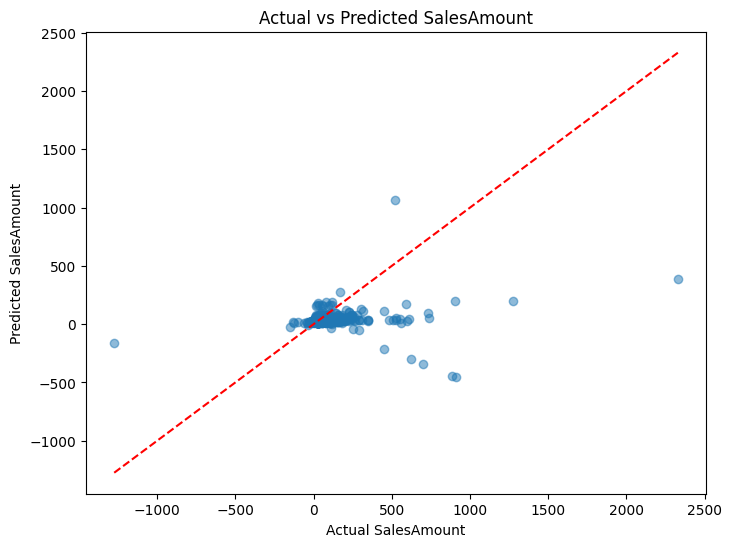

In [22]:
# Step 6: Model Evaluation
# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual SalesAmount')
plt.ylabel('Predicted SalesAmount')
plt.title('Actual vs Predicted SalesAmount')
plt.show()

In [ ]:
# Step 7: Communicate Results



Sales Data Analysis Summary:
1. Data Cleaning:
   - Missing values were filled with the mean for numeric columns.
   - Duplicate rows were removed.
2. Key Features:
   - QuantitySold and SalesAmount have a positive correlation.
   - Outliers were identified in QuantitySold.
3. Model Performance:
   - The Linear Regression model achieved an R-squared of {:.2f}.
   - The Mean Squared Error is {:.2f}